In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('discount.xlsx')

### 1. Общая информация

In [3]:
# посмотрим на набор данных
data.sample(10)

,cid,lid,value,term,rate,promo,loyaltyLevel,loyaltyDiscount
9938,3990030,1472311,9500,40,1.00,NaN,4.0,0.08
12127,2528735,1476695,5000,16,1.00,NaN,0.0,0.02
18176,4526206,1488666,12000,42,0.99,0.15,NaN,NaN
15533,4346546,1483532,5750,15,1.00,NaN,0.0,0.02
12497,2501813,1477414,2500,10,1.00,NaN,0.0,0.02
24836,4151612,1502098,5000,15,1.00,0.10,NaN,NaN
22439,732985,1497319,5750,40,1.00,NaN,6.0,0.12
9560,3875820,1471412,3000,34,1.00,NaN,3.0,0.06
28656,4631549,1509805,12000,56,0.99,0.15,NaN,NaN
27376,2239049,1507411,7800,38,1.00,NaN,6.0,0.12


- cid - id клиента
- lid - id займа
- value - сумма займа
- term - запрошенный срок займа
- rate - ставка до скидки
- promo - скидка по промокоду
- loyaltyLevel - уровень программы лояльности
- loyaltyDiscount - скидка по программе лояльности

In [4]:
# посмотрим на общую информацию таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cid              30000 non-null  int64  
 1   lid              30000 non-null  int64  
 2   value            30000 non-null  int64  
 3   term             30000 non-null  int64  
 4   rate             30000 non-null  float64
 5   promo            9156 non-null   float64
 6   loyaltyLevel     18736 non-null  float64
 7   loyaltyDiscount  18736 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.8 MB


In [5]:
# проверим таблицу на наличие дубликатов
data.duplicated().sum()

0

In [6]:
# проверим таблицу на наличие пропусков
data.isnull().sum()

cid                    0
lid                    0
value                  0
term                   0
rate                   0
promo              20844
loyaltyLevel       11264
loyaltyDiscount    11264
dtype: int64

<div class="alert alert-block alert-info">
<ul>
    <li> в таблице 30 000 строк
    <li> каждая строка - информация об уникальном займе
    <li> в столбцах promo, loyalty_level, loyalty_discount есть пропуски
</ul>
</div>

### 2. Исследование скидочных промокодов

#### 2.1 Общая информация

In [7]:
data['promo'].describe()

count    9156.000000
mean        0.191623
std         0.105013
min         0.100000
25%         0.150000
50%         0.150000
75%         0.150000
max         0.500000
Name: promo, dtype: float64

In [8]:
data['promo'].mode()

0    0.15
dtype: float64

<div class="alert alert-block alert-info">
<ul>
    <li> в столбце promo данные имеются только в 9156 строках
    <li> т.о. из 30 000 займов 30.5% выдаются со скидками 
    <li> среднияя скидка (mean) 19.16%
    <li> медианная скидка (50%) 15%
    <li> мода (самое частое значение) также 15%
</ul>
</div>

#### 2.2 Распределение

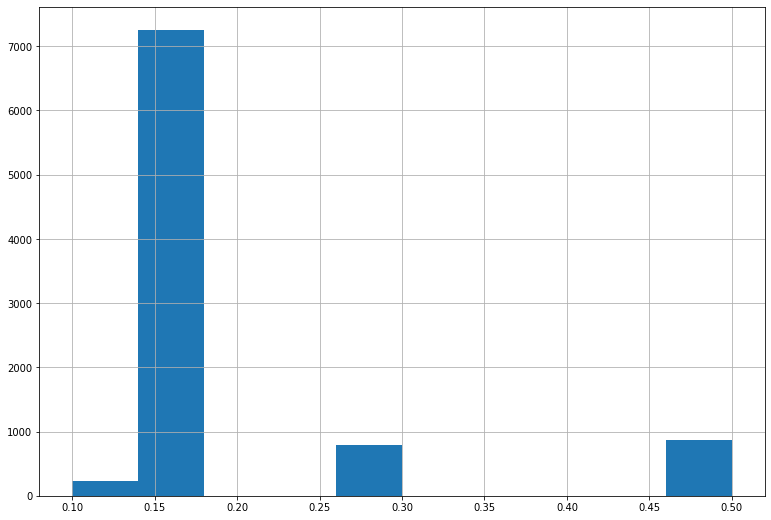

In [9]:
data['promo'].hist(bins=10, figsize=(13, 9));

In [10]:
data['promo'].value_counts()

0.15    7202
0.50     870
0.26     798
0.10     234
0.16      52
Name: promo, dtype: int64

<div class="alert alert-block alert-info">
<ul>
    <li> чаще всего займы оформляются со скидкой 15%
    <li> на втором месте 50%
    <li> на 3 и 5 месте станные суммы в 26% и 16% соответственно
</ul>
</div>

#### 2.3 Расчет средневзвешенной скидки

В этой части для расчетов будем использовать только те займы, которые оформлялись с промокодами.<br>
Т.е. если займ в столбце promo не имеет значений - мы такую строку удаляем.<br>
Это сделано потому, что промокоды отправляются выборочно и не доступны для всех пользователей изначально (в отличие от ПЛ)

In [11]:
promo = data[data['promo'].notna()].drop(columns=['loyaltyLevel', 'loyaltyDiscount']).reset_index(drop=True)

In [12]:
promo['profitBeforeDiscount'] = (promo['value'] * (promo['term'] * promo['rate']) / 100).round().astype('int')
promo['profitAfterDiscount'] = (promo['value'] * (promo['term'] * (promo['rate'] - promo['promo'])) / 100).round().astype('int')

In [13]:
promo.head()

,cid,lid,value,term,rate,promo,profitBeforeDiscount,profitAfterDiscount
0,4316626,1449670,14000,40,1.00,0.15,5600,4760
1,4534475,1450071,8050,23,1.00,0.15,1852,1574
2,4482293,1450192,17250,42,0.99,0.15,7173,6086
3,1338983,1452253,20815,56,0.99,0.15,11540,9791
4,3675968,1452255,10000,56,0.99,0.15,5544,4704


In [14]:
print(promo['profitBeforeDiscount'].mean().round())
print(promo['profitAfterDiscount'].mean().round())

14291.0
9923.0


In [15]:
print(f"Средневзвешенная скидка займов с промокодами {(promo['profitBeforeDiscount'].sum() - promo['profitAfterDiscount'].sum()) / promo['profitBeforeDiscount'].sum():.1%}")

Средневзвешенная скидка займов с промокодами 30.6%


In [16]:
grouped_by_promo = promo.groupby(by='promo').agg({'cid': 'nunique','lid': 'count', 'value': 'mean', 'term': 'mean',
                               'profitBeforeDiscount': 'mean',
                              'profitAfterDiscount': 'mean'}).round().astype('int')

grouped_by_promo.rename(columns={'cid': 'uniqueUsers','lid': 'loans', 'value': 'avgValue'})

,uniqueUsers,loans,avgValue,term,profitBeforeDiscount,profitAfterDiscount
promo,,,,,,
0.10,234,234,8893,23,2217,1995
0.15,7048,7202,14619,46,6868,5828
0.16,52,52,21539,134,28453,23855
0.26,792,798,31133,132,40743,30043
0.50,854,870,40340,135,53875,26666


<div class="alert alert-block alert-info">
<ul>
    <li> средняя ожидаемая прибыль с 1 займа по базовой ставке (по умолчанию все займы погашены успешно и ровно в срок) 14291 рубль
    <li> средняя ожидаемая прибыль с 1 займа с учтом скидки 9923 рубля
    <li> средневзвешенная скидка составила более 30%
    <li> причина - очень большие (50%) скидки на ДЗ. При этом только для ДЗ были такие скидки
    <li> в целом получается, что чем больше чек - тем больше скидка
</ul>
</div>

#### 2.3 Промокоды vs ПЛ

In [17]:
data[data['promo'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 1 to 29986
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cid              9156 non-null   int64  
 1   lid              9156 non-null   int64  
 2   value            9156 non-null   int64  
 3   term             9156 non-null   int64  
 4   rate             9156 non-null   float64
 5   promo            9156 non-null   float64
 6   loyaltyLevel     0 non-null      float64
 7   loyaltyDiscount  0 non-null      float64
dtypes: float64(4), int64(4)
memory usage: 643.8 KB


<div class="alert alert-block alert-info">
<ul>
    <li> кажется на баг или аномалию, но из 9156 займов, в которых был применен промокод не имеют скидки по ПЛ и в целом как-будто не состоят в программе лояльности
    <li> как вариант - програмно стоит приоритет промокода нам ПЛ, втосто определения наибольший скидки
</ul>
</div>

### 3. Исследование скидок по ПЛ

#### 3.1 Общая информация

In [18]:
data['loyaltyDiscount'].describe()

count    18736.000000
mean         0.053544
std          0.041568
min          0.020000
25%          0.020000
50%          0.040000
75%          0.080000
max          0.200000
Name: loyaltyDiscount, dtype: float64

In [19]:
data['loyaltyDiscount'].mode()

0    0.02
dtype: float64

<div class="alert alert-block alert-info">
<ul>
    <li> в столбце loyaltyDiscount данные имеются только в 18736 строках
    <li> т.о. из 30 000 займов 62.5% выдаются со скидками 
    <li> среднияя скидка (mean) 5.3%
    <li> медианная скидка (50%) 4%
    <li> мода (самое частое значение) 2%
</ul>
</div>

#### 3.2 Распределение

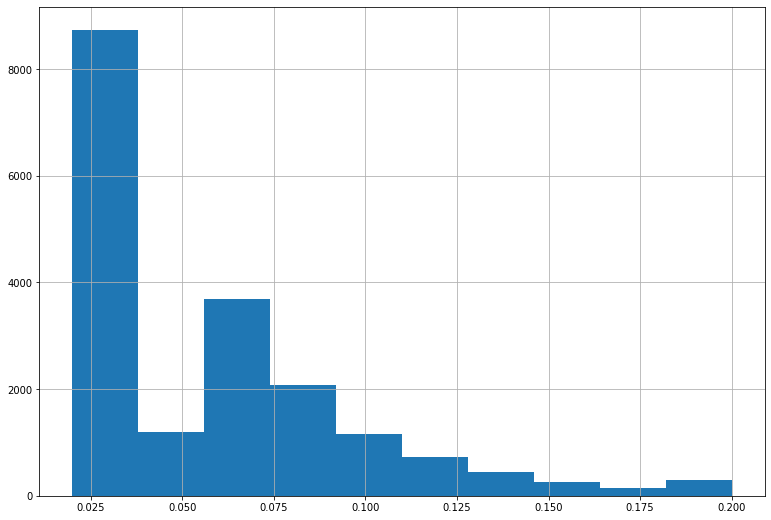

In [20]:
data['loyaltyDiscount'].hist(bins=10, figsize=(13, 9));

In [21]:
data[['loyaltyLevel' ,'loyaltyDiscount']].value_counts()

loyaltyLevel  loyaltyDiscount
0.0           0.02               8733
3.0           0.06               3687
4.0           0.08               2086
2.0           0.04               1201
5.0           0.10               1158
6.0           0.12                719
7.0           0.14                439
10.0          0.20                292
8.0           0.16                266
9.0           0.18                155
dtype: int64

<div class="alert alert-block alert-info">
<ul>
    <li> из 30000 займов скидка по ПЛ есть только у 18736. Выходит, что 11264 займа были оформлены пользователями, которы не имеют уровня в ПЛ. Правда, как мы уже поняли ранее, у 9156 из них есть скидка по промокоду, которая, скорее всего, "сбивает" ПЛ
    <li> еще вроде бы как у ДЗ нет программы лояльности
    <li> 8733 (29%) займа были получены со скидкой в 2% (что соответсвтует 0 уровнею ПЛ). На 0 уровень попадют те, кто не смог подняться с 1 на 2 или "падал" с уровня 2+ до 1
    <li> на 2 уровне меньше пользователей, чем на 2-4 и почти столько же, как на 5. Это опять же связано с тем, что движение со 2 уровня возможно или на 3 или на 0.
    <li> на 10 уровне в 2 раза больше пользователей, чем на 9. А также больше, чем на 8
</ul>
</div>

#### 3.3 Расчет средневзвешенной скидки

In [22]:
loyalty = data.fillna(0)
loyalty['profitBeforeDiscount'] = (loyalty['value'] * (loyalty['term'] * loyalty['rate']) / 100).round().astype('int')
loyalty['profitAfterDiscount'] = (loyalty['value'] * (loyalty['term'] * (loyalty['rate'] - loyalty['loyaltyDiscount'])) / 100).round().astype('int')

loyalty.head()

,cid,lid,value,term,rate,promo,loyaltyLevel,loyaltyDiscount,profitBeforeDiscount,profitAfterDiscount
0,4346488,1449619,7000,12,1.0,0.00,3.0,0.06,840,790
1,4316626,1449670,14000,40,1.0,0.15,0.0,0.00,5600,5600
2,2834045,1449970,9500,10,1.0,0.00,10.0,0.20,950,760
3,4534475,1450071,8050,23,1.0,0.15,0.0,0.00,1852,1852
4,4204786,1450136,4000,30,1.0,0.00,0.0,0.02,1200,1176


In [23]:
print(f"Средневзвешенная скидка по программе лояльности {(loyalty['profitBeforeDiscount'].sum() - loyalty['profitAfterDiscount'].sum()) / loyalty['profitBeforeDiscount'].sum():.1%}")

Средневзвешенная скидка по программе лояльности 1.2%


In [24]:
grouped_by_loyalty = loyalty.groupby(by=['loyaltyLevel', 'loyaltyDiscount']).agg({'cid': 'nunique','lid': 'count', 
                                                                                  'value': 'mean', 'term': 'mean', 
                                                                                  'profitBeforeDiscount': 'mean', 
                                                                                  'profitAfterDiscount': 'mean'}).round().astype('int')

grouped_by_loyalty.rename(columns={'cid': 'uniqueUsers','lid': 'loans', 'value': 'avgValue'})

uniqueUsers  loans  avgValue  term  \
loyaltyLevel loyaltyDiscount                                       
0.0          0.00                   10816  11264     16445    55   
             0.02                    6566   8733      6696    21   
2.0          0.04                    1201   1201      8743    22   
3.0          0.06                    2896   3687      7612    22   
4.0          0.08                    1692   2086      7882    22   
5.0          0.10                     933   1158      8341    23   
6.0          0.12                     591    719      8527    22   
7.0          0.14                     339    439      8814    22   
8.0          0.16                     222    266      9554    22   
9.0          0.18                     118    155      9821    22   
10.0         0.20                     210    292     10476    25   

                              profitBeforeDiscount  profitAfterDiscount  
loyaltyLevel loyaltyDiscount                                             
0.0          0.00                            12025                12025  
             0.02                             1519                 1488  
2.0          0.04                             2000                 1920  
3.0          0.06                             1785                 1678  
4.0          0.08                             1877                 1727  
5.0          0.10                             2057                 1851  
6.0          0.12                             2037                 1793  
7.0          0.14                             2111                 1816  
8.0          0.16                             2270                 1907  
9.0          0.18                             2342                 1920  
10.0         0.20                             2737                 2189

#### 3.4 Проверка на корреляцию

In [25]:
loans_by_users = loyalty.groupby(by='cid').agg({
    'lid': 'count', 
    'value': 'sum',
    'loyaltyDiscount': 'max'}).\
sort_values(by='lid', ascending=False).reset_index()

loans_by_users.head(20)

,cid,lid,value,loyaltyDiscount
0,4267137,17,77000,0.02
1,3639616,16,313000,0.02
2,4343544,16,198700,0.02
3,4488303,15,41355,0.02
4,4634633,14,33630,0.02
5,4126527,13,73700,0.02
6,3752757,13,27000,0.14
7,4576668,12,169000,0.02
8,4584887,11,116100,0.02
9,3737095,11,152900,0.02


In [26]:
loans_by_users['lid'].corr(loans_by_users['loyaltyDiscount'])

0.2150093916543569

<div class="alert alert-block alert-info">
<ul>
    <li> средневзвешенная скидка по ПЛ составила 1.2%
    <li> вывод - программа лояльности в таком виде не выполняет поставленную цель
    <li> на это также указывает тот факт, что кол-во займов пользователей не коррелируется с размером скидки
</ul>
</div>

In [27]:
data.groupby(by='loyaltyDiscount').agg({'term': 'sum'})

,term
loyaltyDiscount,
0.02,184879
0.04,26236
0.06,80988
0.08,46497
0.10,26222
0.12,16115
0.14,9483
0.16,5947
0.18,3399


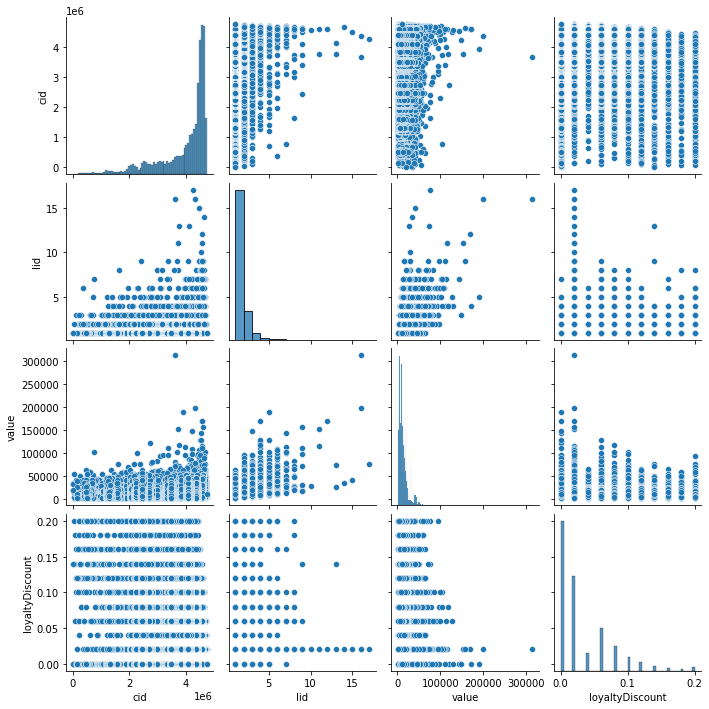

In [33]:
sns.pairplot(loans_by_users);